# Série TP 7 - Fouille de Données - Simple Linear Regression 

## Part 1 - Simple Linear Regression from Scratch

### 1 - Dataset

In [1]:
train_dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]

In [2]:
X = [row[0] for row in train_dataset]
y = [row[1] for row in train_dataset]

In [3]:
X, y

([1, 2, 4, 3, 5], [1, 3, 3, 2, 5])

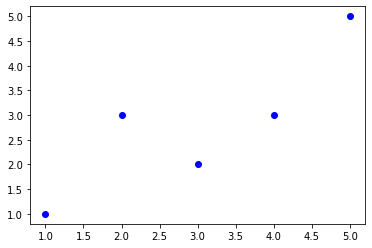

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

# plot train set datapoints
plt.plot(X, y, 'bo')

### 2 - Coefficients calculation - b0 and b1

In [7]:
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))

In [8]:
mean_x, mean_y = mean(X), mean(y)
print(mean_x, mean_y)

3.0 2.8


In [10]:
# Calculate covariance between x and y : (x - mean_x) * (y - mean_y)
def covariance(X, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(X)):
        covar += (X[i] - mean_x) * (y[i] - mean_y)
    return covar

In [12]:
covar = covariance(X, mean_x, y, mean_y)
print(covar)

8.0


In [13]:
# Calculate the variance of X : (x - mean_x)²
def variance(values, mean):
    return sum([(x - mean)**2 for x in values])

In [17]:
var_x = variance(X, mean_x)
print(var_x)

10.0


In [31]:
b1 = covariance(X, mean_x, y, mean_y) / variance(X, mean_x) # b1 = covar / var_x
print('b1 =', b1)

b1 = 0.8


In [25]:
b0 = mean_y - b1 * mean_x
print(b0)

0.39999999999999947


In [30]:
b0 = float("{:.2f}".format(b0))
print('b0 =', b0)

b0 = 0.4


### 3 - Plot linear regression  model : f(x) = b1*x + b0

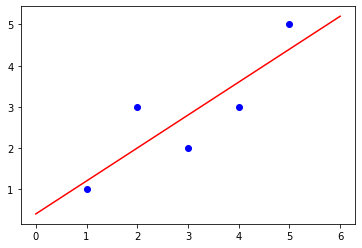

In [35]:
# plot train datapoints
plt.plot(X, y, 'bo')

# plot the regrssion line with coefficients b0 and b1
x_values = [i for i in range(0, 7)]
y_values = [(b1*x + b0) for x in x_values]
plt.plot(x_values, y_values, 'r')

### 4 - Make predictions - predicting Y values of the training dataset

In [39]:
y_preds = []
for x in X:
    y_pred = b0 + b1 * x
    y_preds.append(y_pred)

In [40]:
y_preds

[1.2000000000000002, 2.0, 3.6, 2.8000000000000003, 4.4]

In [41]:
y

[1, 3, 3, 2, 5]

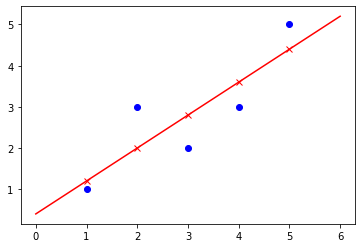

In [45]:
# plot actual values - blue dots
plt.plot(X, y, 'bo')

# plot predicted values - red x
plt.plot(X, y_preds, 'rx')

# plot the regrssion line with coefficients b0 and b1 - red line
x_values = [i for i in range(0, 7)]
y_values = [(b1*x + b0) for x in x_values]
plt.plot(x_values, y_values, 'r')

### 5 - MSE and RMSE calculation

In [51]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [52]:
mse = mean_squared_error(y, y_preds)
print(mse)

0.48


In [56]:
rmse = sqrt(mse)
print('RMSE =', rmse)

RMSE = 0.6928203230275509


### 6 - Linear Regression with Gradient Descent from scratch

In [61]:
# Convert x list into numpy array
import numpy as np
X_np = np.asarray(X, dtype=np.float64)

In [64]:
# 1 - init coefficients m (=b1) and c (=b0) to 0
m = 0
c = 0

# 2 - initialize learning rate l and number of epochs 
l = 0.1  
epochs = 2 

# Number of elements in X
n = float(len(X)) 

# Performing Gradient Descent for epochs iterations
for i in range(epochs):
    # 3 - y_preds calculation
    y_preds = m * X_np + c  
    
    # 4 - Dm and Dc calculation
    D_m = (-2/n) * sum(X * (y - y_preds))  
    D_c = (-2/n) * sum(y - y_preds)  
    
    # 5 - Update m and c values
    m = m - l * D_m  # Update m
    c = c - l * D_c  # Update c
    
    print(f'>epoch={i}, lrate={l}, m={m}, c={c}')
    
print (m, c)

>epoch=0, lrate=0.1, m=2.0, c=0.56
>epoch=1, lrate=0.1, m=-0.7360000000000007, c=-0.19200000000000017
-0.7360000000000007 -0.19200000000000017


#### Ref 1 : https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/
#### Ref 2 : https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/
#### Ref 3 : https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931